In [0]:
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 35kB/s 
     |████████████████████████████████| 368kB 50.9MB/s 
     |████████████████████████████████| 3.2MB 25.7MB/s 
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


In [0]:
import tensorflow as tf
import numpy as np

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# Problem 1 (10 pts)

**CIFAR10 클래스가 다음과 같은 기능을 갖도록 코드를 작성하시오.**


-get_train_batch 함수로 batch_size 만큼의 학습데이터를 return한다.

-get_test_batch 함수로 Validation or Test 데이터를 return한다.
*   is_val=True 이면 Validation 데이터를, False이면 Test데이터를 return한다.
*   split_num개만큼 데이터를 split하여 list 형태로 return한다. ex) Data : numpy array [1,2,3,4,5,6], split_num : 2, -> return : [[1,2,3], [4,5,6]]

-epochs와 iterations 변수를 통해 현재 epoch과 iteration 정보를 얻을 수 있다.
*   ex) cifar10 = CIFAR10(), print(cifar10.epochs) -> 20

-reset 함수를 통해 epoch과 iteration 정보를 초기화 시킨다. (새로운 모델에 처음부터 다시 학습을 시작할 때 사용)

In [0]:
class CIFAR10:
  def __init__(self):
    self.X_train = np.load("/gdrive/My Drive/Colab_Notebooks/CIFAR10_datasets/CIFAR10_X_train.npy")
    self.Y_train = np.load("/gdrive/My Drive/Colab_Notebooks/CIFAR10_datasets/CIFAR10_y_train.npy")
    self.X_test = np.load("/gdrive/My Drive/Colab_Notebooks/CIFAR10_datasets/CIFAR10_X_test.npy")
    self.Y_test = np.load("/gdrive/My Drive/Colab_Notebooks/CIFAR10_datasets/CIFAR10_y_test.npy")

    self.X_val = self.X_train[45000:]
    self.Y_val = self.Y_train[45000:]
    self.X_train = self.X_train[:45000]
    self.Y_train = self.Y_train[:45000]

    self.idx_flag = 0
    self.epochs = 0
    self.iterations = 0

  def get_train_batch(self, batch_size=64):
    X_batch, Y_batch = None, None,
    ####################### Put your code here ###############
    idx = np.arange(0, len(self.X_train))
    np.random.shuffle(idx)
    idx = idx[:batch_size]
    X_batch = [self.X_train[i] for i in idx]
    Y_batch = [self.Y_train[i] for i in idx]
    X_batch = np.asarray(X_batch)
    Y_batch = np.asarray(Y_batch)
    X_batch /= 255
    self.iterations += 1
    if self.iterations >= len(self.X_train)/batch_size:
      self.epochs += 1
      self.iterations = 0
    ##########################################################
    return X_batch, Y_batch

  def get_test_batch(self, is_val=True, split_num=100):
    split_X, split_Y = None, None
    ####################### Put your code here ###############
    split_X = []
    split_Y = []
    if is_val:
      for i in range(int(len(self.X_val)/split_num)):
        split_X.append(self.X_val[self.idx_flag:self.idx_flag+int(len(self.X_val)/split_num)]/255)
        split_Y.append(self.Y_val[self.idx_flag:self.idx_flag+int(len(self.X_val)/split_num)])
        self.idx_flag += int(len(self.X_val)/split_num)
      self.idx_flag = 0
    else:
      for i in range(int(len(self.X_test)/split_num)):
        split_X.append(self.X_test[self.idx_flag:self.idx_flag+int(len(self.X_test)/split_num)]/255)
        split_Y.append(self.Y_test[self.idx_flag:self.idx_flag+int(len(self.X_test)/split_num)])
        self.idx_flag += int(len(self.X_test)/split_num)
      self.idx_flag = 0
    ##########################################################
    return split_X, split_Y
  
  def reset(self):
    ####################### Put your code here ###############
    self.idx_flag = 0
    self.epochs = 0
    self.iterations = 0
    ##########################################################

# Problem 2 (20 pts)
**tensorflow 라이브러리를 이용하여 다음 함수들을 작성하시오.**

In [0]:
def conv_layer(input, output_channel, filter_size=2, stride=1, padding='same', use_bias=True):
  output = None
  ####################### Put your code here ###############
  output = tf.layers.conv2d(inputs=input,use_bias=use_bias,filters=output_channel,kernel_size=filter_size,strides=stride,padding=padding)
  ##########################################################
  return output

def fc_layer(input, output_size, use_bias=True):
  output = None
  ####################### Put your code here ###############
  with tf.name_scope("fully_connected"):
    output = tf.layers.dense(inputs=input,use_bias=use_bias,units=output_size)
  ##########################################################
  return output

def squeeze_excitation_block(input, ratio=16):
  output = None
  ####################### Put your code here ###############
  output = global_average_pooling(input)
  output = fc_layer(output, 64/ratio)
  output = relu(output)
  output = fc_layer(output,64)
  output = sigmoid(output)
  output = tf.reshape(output, [-1,1,1,64])
  output = input * output

  ##########################################################
  return output

def relu(input):
  output = None
  ####################### Put your code here ###############
  output = tf.nn.relu(input)
  ##########################################################
  return output

def sigmoid(input):
  output = None
  ####################### Put your code here ###############
  output = tf.nn.sigmoid(input)
  ##########################################################
  return output

def global_average_pooling(input):
  output = None
  ####################### Put your code here ###############
  
  with tf.name_scope("GAP"):
    output = tf.reduce_mean(input,axis=[1,2])
  ##########################################################
    return output

def max_pooling(input, filter_size=2, stride=2, padding="same"):
  output = None
  ####################### Put your code here ###############
  output = tf.layers.max_pooling2d(inputs=input,pool_size=filter_size,strides=stride,padding=padding)
  ##########################################################
  return output
  
def flatten_block(input):
  output = None
  ####################### Put your code here ###############
  output = tf.contrib.layers.flatten(input)
  ##########################################################
  return output

def batch_norm(input, is_training):
  output = None
  ####################### Put your code here ###############
  output = tf.contrib.layers.batch_norm(input,decay=0.9,is_training=is_training)
  ##########################################################
  return output

# Problem 3 (20 pts)

Problem 2에서 작성한 함수들을 이용하여 다음 조건을 만족하는 CNN 모델을 작성하시오.
*   Validation accuracy가 70% 이상인 네트워크.
*   use_SE=True이면 Squeeze and Excitation block이 추가된 모델을, False이면 추가되지 않은 모델을 return.
*   두개의 모델은 SE block의 유무를 제외한 모든 세팅이 같아야함. (하이퍼 파라미터, SE block 이외의 layer 구조 등)

In [0]:
def cnn_model(X, Y, is_training, use_SE=True):
  loss, accuracy, backprop = None, None, None
  ####################### Put your code here ###############
  with tf.name_scope("First"):
    
    logits = conv_layer(X,output_channel=64,filter_size=[3,3])
    logits = relu(logits)
    logits = max_pooling(logits)
    logits = batch_norm(logits,is_training)
    if use_SE :
      logits = squeeze_excitation_block(logits, ratio=16)

    logits = conv_layer(X,output_channel=128,filter_size=[3,3])
    logits = relu(logits)
    logits = max_pooling(logits)
    logits = tf.layers.dropout(inputs=logits,rate=0.3,training=is_training)
    logits = batch_norm(logits,is_training)

    logits = conv_layer(X,output_channel=256,filter_size=[5,5])
    logits = relu(logits)
    logits = max_pooling(logits)
    logits = tf.layers.dropout(inputs=logits,rate=0.3,training=is_training)
    logits = batch_norm(logits,is_training) 
   
  with tf.name_scope("Last"):
    logits = flatten_block(logits)
    logits = fc_layer(logits,256)
    logits = relu(logits)
    logits = tf.layers.dropout(inputs=logits,rate=0.5,training=is_training)
    logits = batch_norm(logits,is_training)

    logits = fc_layer(logits,10)
    
  Y_one_hot = tf.one_hot(Y,10)
  
  loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y_one_hot))
  opt = tf.train.AdamOptimizer(learning_rate=0.001)
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  with tf.control_dependencies(update_ops):
    backprop = opt.minimize(loss)
  predict = tf.equal(tf.argmax(logits,1),tf.argmax(Y_one_hot,1))
  accuracy = tf.reduce_mean(tf.cast(predict,tf.float32))
  ##########################################################
  return loss, accuracy, backprop

# Problem 4 (20 pts)

Problem 3에서 작성된 모델을 학습하고 테스트 하는 함수를 작성하여라.

In [0]:
def train_model(sess, cifar10, X, Y, is_training, loss, accuracy, backprop, epochs=10, batch_size=32, check_iter=100, split_num=100):
  train_loss_list, validation_loss_list, train_acc_list, validation_acc_list = [], [], [], []
  while cifar10.epochs < epochs:
    l, acc = None, None
    ####################### Put your code here ###############
    batch_x,batch_y = cifar10.get_train_batch()
    feed_dict = {X: batch_x, Y: batch_y, is_training : True}
    _,l = sess.run([backprop,loss],feed_dict)
    acc = accuracy.eval(feed_dict = feed_dict)
    ##########################################################
    if cifar10.iterations%check_iter == 0:
      val_loss, val_acc = test_model(sess, cifar10, X, Y, is_training, loss, accuracy, split_num, is_val=True)
      print('Epochs : %d, Iterations : %d, Train_loss : %f, Train_accuracy : %.3f, Val_loss : %f, Val_accuracy : %.3f'%\
            (cifar10.epochs, cifar10.iterations, l, acc, val_loss, val_acc))
      train_loss_list.append(l)
      validation_loss_list.append(val_loss)
      train_acc_list.append(acc)
      validation_acc_list.append(val_acc)
      
  return train_loss_list, validation_loss_list, train_acc_list, validation_acc_list

def test_model(sess, cifar10, X, Y, is_training, loss, accuracy, split_num, is_val):
  X_list, Y_list = cifar10.get_test_batch(is_val=is_val, split_num=split_num)
  accs, losses = None, None
  ####################### Put your code here ###############
  accs = 0.0
  losses = 0.0
  ##########################################################
  for X_batch, Y_batch in zip(X_list, Y_list):
    ####################### Put your code here ###############
    feed_dict = {X:X_batch,Y:Y_batch, is_training: False}
    t_losses,t_accs = sess.run([loss,accuracy],feed_dict = feed_dict)
    t_accs = accuracy.eval(feed_dict={X:X_batch,Y:Y_batch,is_training:False})
    losses += t_losses
    accs += t_accs
    ##########################################################
  ####################### Put your code here ###############
  losses /= len(X_list)
  accs /= len(X_list)
  ##########################################################
  return losses, accs

# Problem 5 (20 pts)

SE block이 없는 CNN 모델과, SE block이 추가된 CNN 모델을 각각 학습하시오. (단, 아래의 조건을 만족하여야 함)
*   둘중 적어도 하나의 모델은 Validation accuracy 70% 이상. (도달하지 못한다면 모델을 Problem 3의 모델을 수정하시오)
*   두개의 모델은 SE block의 유무를 제외한 모든 세팅이 같아야함. (하이퍼 파라미터, SE block 이외의 layer 구조 등)

# CNN training and test without Squeeze and Excitation block

In [0]:
cifar10 = CIFAR10()
  
X = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 3])
Y = tf.placeholder(dtype=tf.int64, shape=[None])
is_training = tf.placeholder(tf.bool)

loss, accuracy, backprop = cnn_model(X, Y, is_training, use_SE=False)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  result_without_SE = train_model(sess, cifar10, X, Y, is_training, loss, accuracy, backprop, epochs=100, check_iter=300, batch_size=128)
  test_loss, test_acc = test_model(sess, cifar10, X, Y, is_training, loss, accuracy, split_num=100, is_val=False)
  print("Test_loss :z %f, Test_accuracy : %.3f"%(test_loss, test_acc))

sess.close()

Epochs : 0, Iterations : 300, Train_loss : 1.531449, Train_accuracy : 0.438, Val_loss : 1.746682, Val_accuracy : 0.472
Epochs : 0, Iterations : 600, Train_loss : 1.651566, Train_accuracy : 0.484, Val_loss : 1.688966, Val_accuracy : 0.443
Epochs : 1, Iterations : 0, Train_loss : 1.709498, Train_accuracy : 0.484, Val_loss : 1.515257, Val_accuracy : 0.516
Epochs : 1, Iterations : 300, Train_loss : 1.365753, Train_accuracy : 0.516, Val_loss : 1.624676, Val_accuracy : 0.490
Epochs : 1, Iterations : 600, Train_loss : 1.126096, Train_accuracy : 0.656, Val_loss : 1.451345, Val_accuracy : 0.568
Epochs : 2, Iterations : 0, Train_loss : 1.224690, Train_accuracy : 0.594, Val_loss : 1.377928, Val_accuracy : 0.540
Epochs : 2, Iterations : 300, Train_loss : 1.339610, Train_accuracy : 0.547, Val_loss : 1.272236, Val_accuracy : 0.584
Epochs : 2, Iterations : 600, Train_loss : 1.027817, Train_accuracy : 0.562, Val_loss : 1.496755, Val_accuracy : 0.565
Epochs : 3, Iterations : 0, Train_loss : 1.333162, T

# CNN training and test with Squeeze and Excitation block

In [0]:
cifar10.reset()
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 3])
Y = tf.placeholder(dtype=tf.int64, shape=[None])
is_training = tf.placeholder(tf.bool)

loss, accuracy, backprop = cnn_model(X, Y, is_training, use_SE=True)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  result_with_SE = train_model(sess, cifar10, X, Y, is_training, loss, accuracy, backprop, epochs=100, check_iter=300, batch_size=128)
  test_loss, test_acc = test_model(sess, cifar10, X, Y, is_training, loss, accuracy, split_num=100, is_val=False)
  print("Test_loss : %f, Test_accuracy : %.3f"%(test_loss, test_acc))

sess.close()

Epochs : 0, Iterations : 300, Train_loss : 1.543574, Train_accuracy : 0.438, Val_loss : 1.512439, Val_accuracy : 0.506
Epochs : 0, Iterations : 600, Train_loss : 1.463331, Train_accuracy : 0.531, Val_loss : 1.458945, Val_accuracy : 0.480
Epochs : 1, Iterations : 0, Train_loss : 1.364995, Train_accuracy : 0.609, Val_loss : 1.375398, Val_accuracy : 0.504
Epochs : 1, Iterations : 300, Train_loss : 1.030980, Train_accuracy : 0.625, Val_loss : 1.200191, Val_accuracy : 0.581
Epochs : 1, Iterations : 600, Train_loss : 1.271838, Train_accuracy : 0.547, Val_loss : 1.210823, Val_accuracy : 0.589
Epochs : 2, Iterations : 0, Train_loss : 1.378226, Train_accuracy : 0.625, Val_loss : 1.144298, Val_accuracy : 0.598
Epochs : 2, Iterations : 300, Train_loss : 0.978501, Train_accuracy : 0.609, Val_loss : 1.072069, Val_accuracy : 0.623
Epochs : 2, Iterations : 600, Train_loss : 1.190634, Train_accuracy : 0.625, Val_loss : 1.967355, Val_accuracy : 0.524
Epochs : 3, Iterations : 0, Train_loss : 1.171255, T

# Problem 6 (10 pts)

matplotlib와 result_with_SE, result_without_SE 를 이용하여 다음 learning curve들을 plot 하시오. (여러개의 cell을 사용하여도 무방)

*   SE 사용 네트워크와 SE 미사용 네트워크의 training loss
*   SE 사용 네트워크와 SE 미사용 네트워크의 validation loss
*   SE 사용 네트워크와 SE 미사용 네트워크의 validation accuracy
*   SE 사용 네트워크의 training loss와 validation loss
*   SE 사용 네트워크의 training accuracy와 validation accuracy
*   SE 미사용 네트워크의 training loss와 validation loss
*   SE 미사용 네트워크의 training accuracy와 validation accuracy



In [0]:
import matplotlib.pyplot as plt

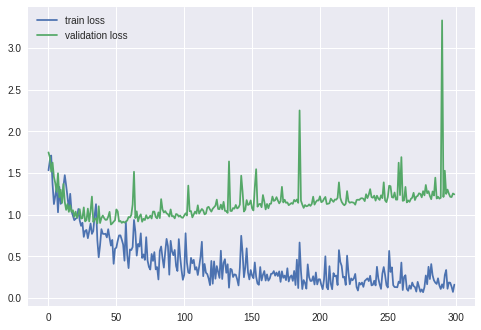

In [0]:
#SE 미사용 네트워크의 training loss와 validation loss
plt.style.use('seaborn')
plt.plot(result_without_SE[0], label = "train loss")
plt.plot(result_without_SE[1], label = "validation loss")
plt.legend()
plt.show()

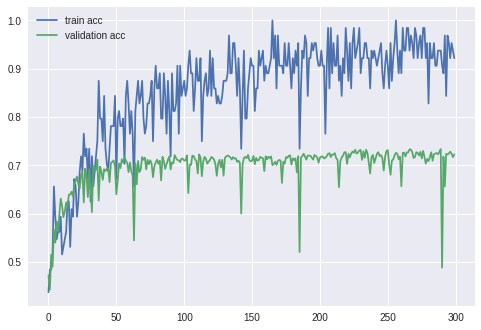

In [0]:
#SE 미사용 네트워크의 training accuracy와 validation accuracy
plt.style.use('seaborn')
plt.plot(result_without_SE[2], label = "train acc")
plt.plot(result_without_SE[3], label = "validation acc")
plt.legend()
plt.show()

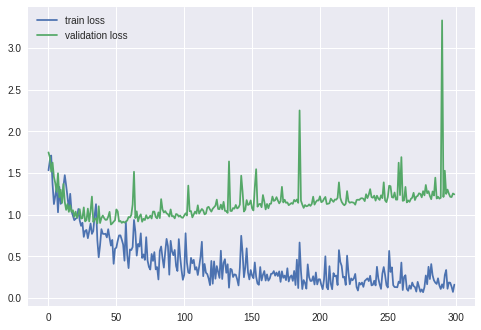

In [0]:
#SE 사용 네트워크의 training loss와 validation loss
plt.style.use('seaborn')
plt.plot(result_without_SE[0], label = "train loss")
plt.plot(result_without_SE[1], label = "validation loss")
plt.legend()
plt.show()

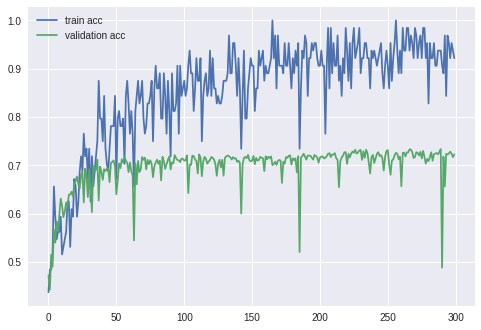

In [0]:
#SE 사용 네트워크의 training accuracy와 validation accuracy
plt.style.use('seaborn')
plt.plot(result_without_SE[2], label = "train acc")
plt.plot(result_without_SE[3], label = "validation acc")
plt.legend()
plt.show()

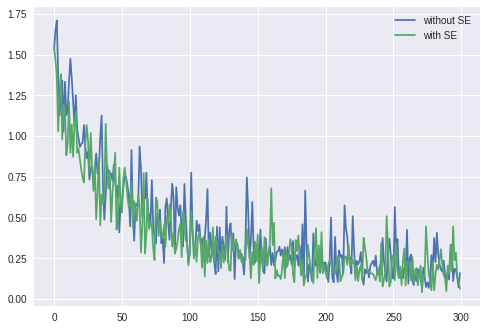

In [0]:
#SE 사용 네트워크와 SE 미사용 네트워크의 training loss
plt.style.use('seaborn')
plt.plot(result_without_SE[0], label = "without SE")
plt.plot(result_with_SE[0], label = "with SE")
plt.legend()
plt.show()



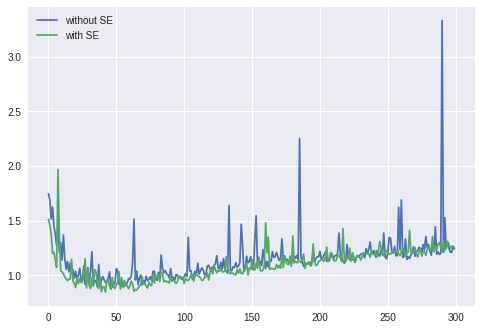

In [0]:
#SE 사용 네트워크와 SE 미사용 네트워크의 validation loss
plt.style.use('seaborn')
plt.plot(result_without_SE[1], label = "without SE")
plt.plot(result_with_SE[1], label = "with SE")
plt.legend()
plt.show()


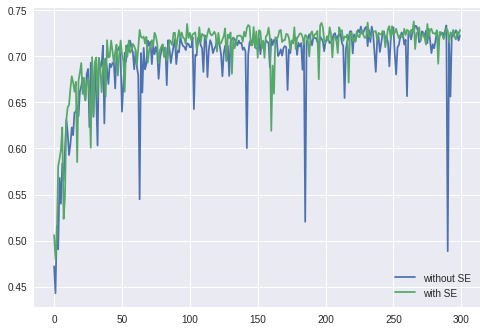

In [0]:
#SE 사용 네트워크와 SE 미사용 네트워크의 validation accuracy
plt.style.use('seaborn')
plt.plot(result_without_SE[3], label = "without SE")
plt.plot(result_with_SE[3], label = "with SE")
plt.legend()
plt.show()